## Linear Regression in Excel with Python

After working through a linear regression example using Python, I wanted to see if it was possible to create an Excel front-end and allow users to load their own datasets, set their parameters, fit a model, and get predictions based on the model, without having to code anything. I also wanted to give a nice summary of the model statistics for users to determine the goodness-of-fit of the model.

To accomplish this, I used <a href="http://statsmodels.sourceforge.net/">statsmodels</a>, <a href="http://pandas.pydata.org/">pandas</a> and <a href="http://xlwings.org/">xlwings</a>.<br> <br> During the process, I ran into several hurdles. One issue was I wanted to take the plot images generated and copy them into the Excel sheet; however, I wasn't able to find a way to accomplish this. The package <a href="http://www.python-excel.org/">xlrd</a> contains an Image object, but it only works on bitmap files.<br> <br> The second issue I came across taking data from the Data tab of the Excel workbook and loading it to process with Pandas. Since the Excel book is in .xlsx format, the data is copied in with additional headers and causes the actual column names to shift down one. 

Because of these limitations, I decided to use an IPython Notebook for creating and fitting linear regression models and printing the results to Excel to share for those who use Excel exclusively and those who don't want to bother installing Python and/or using the Notebook (something I run into frequently in my current position).

However, I revised the process to allow other users to simply change the paths of the Regression Workbook and the data to be able to do the same analysis. While I wasn't able to build an Excel-only method for linear regression (other than using the dreadful LINEST function), one could quickly run through the notebook and be given a linear regression model using Python.

If you'd like to learn more about linear regression, feel free to check out my <a href="http://nbviewer.ipython.org/github/aschleg/IPython_Notebooks/blob/master/Linear%20Regression%20with%20Python.ipynb">Linear Regression with Python notebook</a>

###Getting Started

First, we will load all the required packages

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from IPython.display import Image

### Workbook Path

To load the Linear Regression Workbook, simply change the workbook variable's string to where you have the workbook saved. 

In [3]:
workbook = 'C:/Users/Aaron/Google_Drive/Projects/Python_R_Data_Analysis/Python/Linear_Regression_Workbook.xlsx'

The next line will load xlwings and open the workbook

In [8]:
from xlwings import Range, Workbook, Chart
wb = Workbook(workbook)

In [4]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/lr_workbook.png')

#### Data Set (CSV) Path

The data_path variable's string can be changed to the path where you have the data set you wish to load.

In [9]:
data_path = 'C:/Users/Aaron/Google_Drive/Projects/Python_R_Data_Analysis/Python/Ginzberg.csv'

#### Read the CSV file

In [10]:
data = pd.read_csv(data_path)

#### Check out the first few rows of the data

In [12]:
data.head()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


Copy the data into the Data tab of the Excel sheet

In [142]:
Range("Data", "A1").value = data

After loading the data into the Data tab, the variables will show in the Data Set Variables section of the Results tab in the Excel sheet. You can use these to set the variables you would like to perform linear regression on.

In [5]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/lr_workbook_var.png')

In [143]:
params = str(Range("K5").value)

To run the regression, all you need to do is enter the variables you would like to regress in Column H. The y will be the dependent variable and the x values are the independent variables. You can use up to 20 independent variables for the analysis. The Regression Formula to be Fitted Column will automatically populate the necessary string for statsmodels to run the regression.

In [6]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/lr_workbook_prepare.png')

Note - since the data is loaded through pandas read_csv function, the data will be copied with an 'index' column. You can simply ignore this when entering the regression variables"

In the example above, we have chosen 'depression' to be the dependent variable and will take the independent variables 'fatalism' and 'simplicity'. The Regression Formula to be fitted in cell K5 will automatically populate the variables for the model. This is then passed into the params object on the next line for statsmodels to initiate the regression.

You can use the next line to check and make sure the regression formula is how you entered it.

In [ ]:
params

Now that we have our data and our formula, we can get to the fun part!

Running the Regression and Printing the values to Excel

In [145]:
model = smf.ols(params, data = data).fit()

The next line prints a summary of the fitted model. Since the results aren't printed in a fashion that allows copying into Excel, the next few lines create objects for each regression result and prints them to Excel.

In [146]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     42.58
Date:                Wed, 25 Jun 2014   Prob (F-statistic):           2.84e-13
Time:                        13:34:42   Log-Likelihood:                -29.024
No. Observations:                  82   AIC:                             64.05
Df Residuals:                      79   BIC:                             71.27
Df Model:                           2                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2027      0.095      2.140      0.035         0.014     0.391
fatalism       0.4178      0.101      4.151      0.0

This block creates the objects for each statistic we'd like printed to Excel.<br> <br> It will report $R^2$, $R^2 adj,$ residuals, the f p-value, aic, the fitted model parameters, normality of the residuals, the Bruesh-Pagan Test for heteroscedasicity and the Harvey-Collier test for linearity.

In [147]:
r_squared = model.rsquared
r_square_adj = model.rsquared_adj
residuals = model.resid
p = model.f_pvalue
aic = model.aic
pvalues = pd.DataFrame(model.pvalues)
params = pd.DataFrame(model.params)
normality = sms.jarque_bera(model.resid)
breush_pagan_hska = sms.het_breushpagan(model.resid, model.model.exog)
harvey_collier = sms.linear_harvey_collier(model)

Print the regression results to Excel

In [148]:
Range("Results", "O6").value = "R^2"
Range("Results", "P6").value = r_squared

Range("Results", "O7").value = "R^2 Adjusted"
Range("Results", "P7").value = r_square_adj

Range("Results", "O8").value = "p-value"
Range("Results", "P8").value = p

Range("Results", "O9").value = "AIC"
Range("Results", "P9").value = aic

Range("Results", "O10").value = "Harvey-Collier t-value"
Range("Results", "P10").value = harvey_collier[0]

Range("Results", "O11").value = "Harvey-Collier p-value"
Range("Results", "P11").value = harvey_collier[1]

Range("Results", "R6").value = "Jarque-Bera"
Range("Results", "S6").value = normality[0]

Range("Results", "R7").value = "Chi^2 two-tail"
Range("Results", "S7").value = normality[1]

Range("Results", "R8").value = "Skew"
Range("Results", "S8").value = normality[2]

Range("Results", "R9").value = "Kurtosis"
Range("Results", "S9").value = normality[3]

Range("Results", "R12").value = "Lagrange Multiplier"
Range("Results", "S12").value = breush_pagan_hska[0]

Range("Results", "R13").value = "p-value"
Range("Results", "S13").value = breush_pagan_hska[1]

Range("Results", "R14").value = "f-value"
Range("Results", "S14").value = breush_pagan_hska[2]

Range("Results", "R15").value = "f p-value"
Range("Results", "S15").value = breush_pagan_hska[3]

Range("Results", "Z3").value = "residuals"
Range("Results", "Z6").value = pd.DataFrame(residuals)

Range("Results", "R17").value = "Coefficients"
Range("Results", "S17").value = params

Range("Results", "O17").value = "P>|t|"
Range("Results", "P17").value = pvalues

The results will then be printed to Excel

In [7]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/lr_workbook_results.png')

### Making Predictions with the Fitted Model

Now that we have a fitted model, we can make predictions! After the statistics are copied into Excel, each dependent variable is copied into Column K. You can enter values to the right of the variable to predict the dependent variable.<br> <br> For example, let's predict a patient's Beck depression self-assessment test based on their need to view the world in black and white and their level of fatalism.<br> <br> Let's say their fatalism level is 0.5 and their black and white worldview scores at 0.6. We enter 0.5 next to the fatalism variable and 0.6 next to the simplicity variable.

In [8]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/lr_workbook_prediction.png')

Based on the model, we can predict a patient that has a simplicity and fatalism score of 0.6 and 0.5 will have a self-assessed depression score of .6393.

The next lines of code will print regression plots to help you verify the goodness-of-fit of the model. In order to get these into Excel, you would need to right-click on the image to save or copy it and then paste it into the Excel sheet.

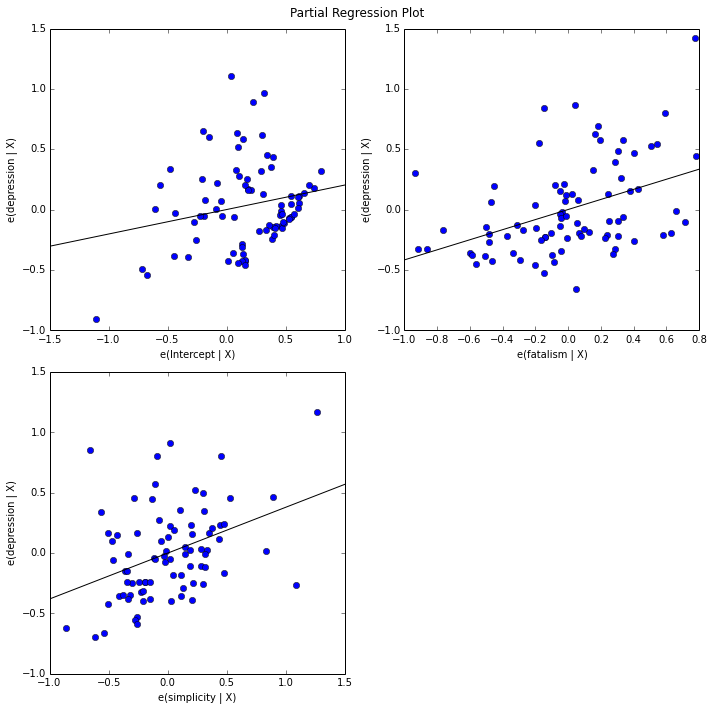

In [135]:
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

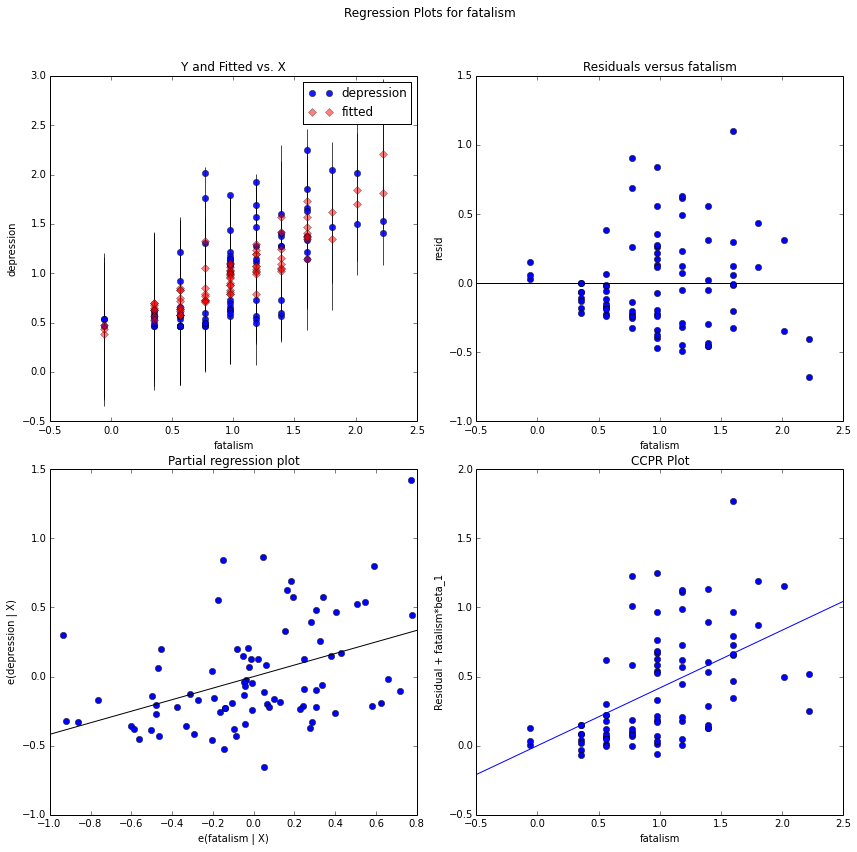

In [136]:
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_regress_exog(model, "fatalism", fig=fig)

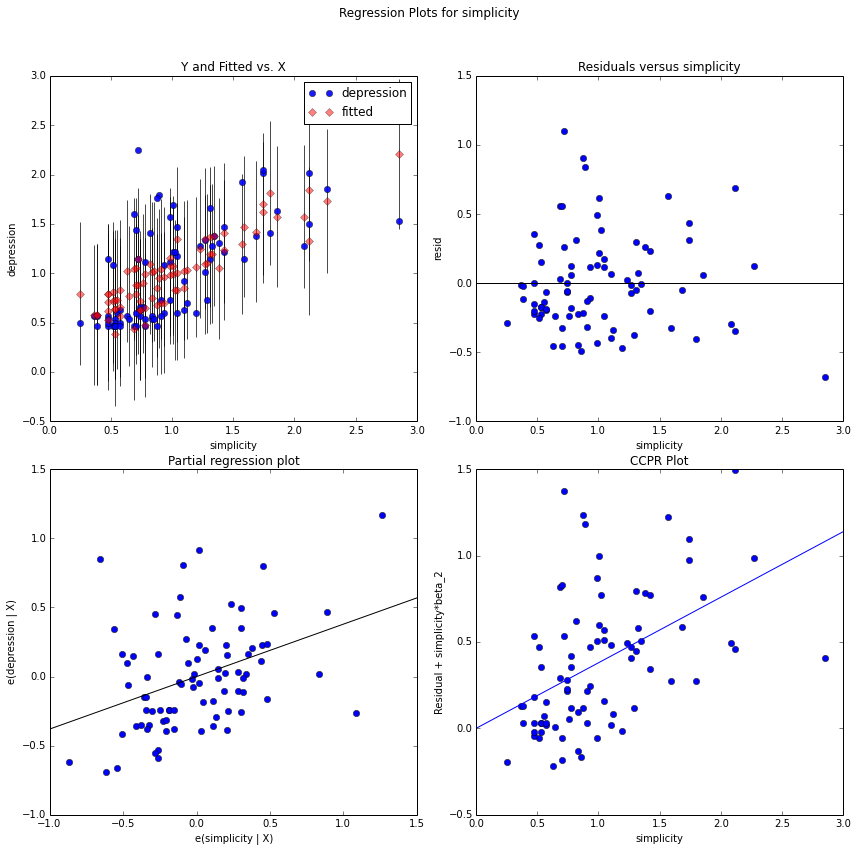

In [137]:
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_regress_exog(model, "simplicity", fig=fig)

I hope this process of working in an IPython Notebook and copying the results into a more ubiquitious program such as Excel to share will help those who want to perform linear regression without having to code anything. The created Excel document can then be shared with other people to explain your findings. I had hoped for a pure Excel/Python implementation; however, there are a lot of limitations when it comes to VBA (also, it's a bummer).

In [1]:
from IPython.core.display import HTML
def css():
    style = open("css/custom.css", "r").read()
    return HTML(style)
css()